In [1]:
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import gridspec

# Define font to avoid displaying square boxes in plot text
plt.rcParams['font.sans-serif'] = ['STSong']
plt.rcParams['axes.unicode_minus'] = False


In [2]:
# Define the dynamic system of equations
def EGT(Fx, t, R1, R2, F1, F2, S1, S2, V1, V2, K, m, n, delta,
        I1, P, Chigh, Clow, D, I2, lambda_val, DeltaU,  H, C, N):
    x, y, z = Fx.tolist()
    dxdt = x * (1 - x) * (R1 - R2 + (S2 - S1 + F2 - F1) * y + n * (P - I1) * z - delta * n * (P - I1) * y * z)
    dydt = y * (1 - y) * (S2 + m * n * (Clow - Chigh) + F2 + x * (S1 - S2 + delta * m * n * (K - Chigh - D) + (F1 - F2)) 
                          + x * z * ((1 + delta) * m * n * (K - D) + m * n * ((1 + 2 * delta) * Chigh + delta * Clow) 
                                     + delta * n * P - C))
    dzdt = z * (1 - z) * (V2 + DeltaU + x * (V1 - V2 + delta * m * n / N * H) 
                          + y * (lambda_val - 1) * DeltaU 
                          + x * y * (delta * n * I2 + delta ** 2 * m * n / N * H))
    return [dxdt, dydt, dzdt]


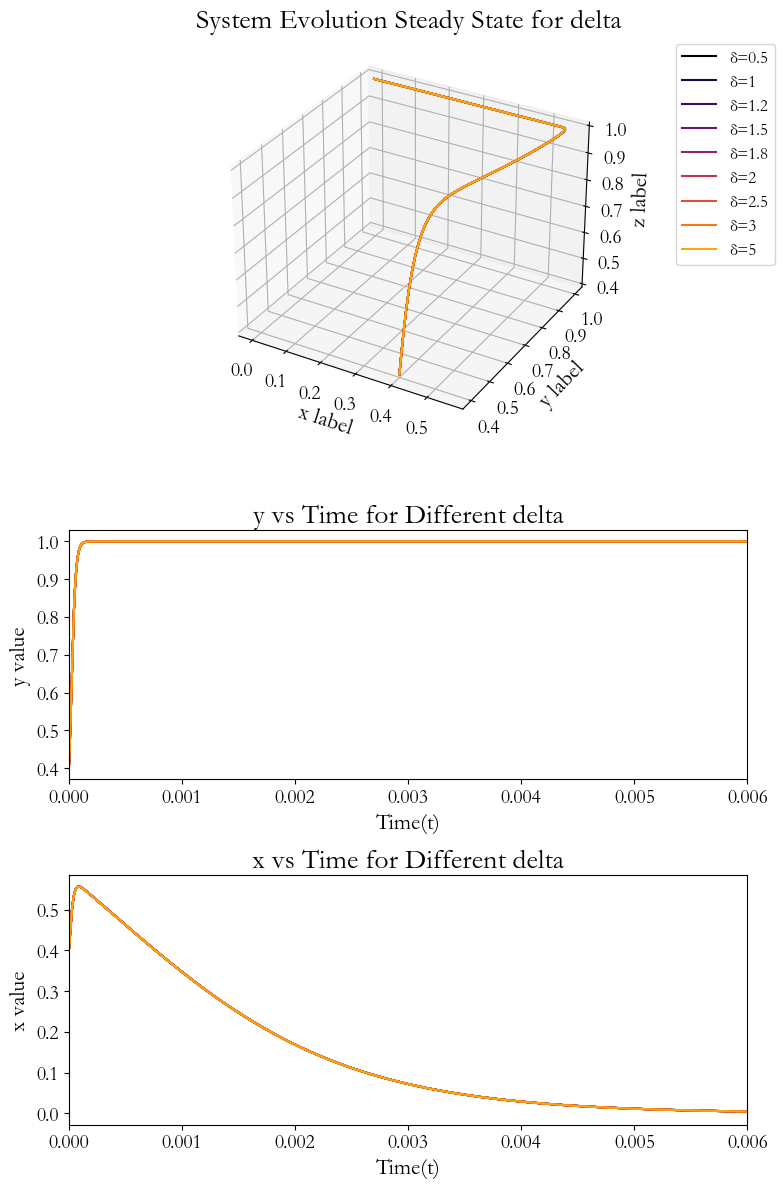

In [3]:
# Set plot parameters
plt.close("all")
fig = plt.figure(figsize=(8, 12))  

# Use gridspec to adjust layout so that the 3 plots are stacked vertically
gs = gridspec.GridSpec(3, 1, height_ratios=[0.8, 0.5, 0.5])  # First row takes up twice the height of the other two

# Create 3D plot, 2D plot (y) and 2D plot (x) subplots
ax1 = fig.add_subplot(gs[0], projection='3d')  # 3D plot
ax2 = fig.add_subplot(gs[1])  # 2D plot showing change in y
ax3 = fig.add_subplot(gs[2])  # New 2D plot showing change in x

# Time range
t = np.arange(0, 0.01, 0.000001)  # Original time range

# New list of delta values
delta_values = [0.5, 1, 1.2, 1.5, 1.8, 2, 2.5, 3, 5]  # Assume we want to try these delta values

# Use a gradient color map
colors = cm.inferno(np.linspace(0, 0.8, len(delta_values)))  # Using gradient color map

# Set line style, width, and labels
linewidths = [1.5] * len(delta_values)  # All line widths are 1.5
labels = [f'δ={delta}' for delta in delta_values]

# Base parameters
base_args = (13975.2, 4658.4, 10000, 709.37, 1000, 10, 0.01, 0, 7000, 4, 13, 1,
            2189.49, 2000, 246.375, 492.75, 7130.73, 0.09, 0.029, 526000, 255.19, 1798.19, 26)

# Used to store x and y data for each delta value
x_data = {}
y_data = {}

# Plot the trajectory in the 3D plot
for i, delta in enumerate(delta_values):
    args = base_args[:12] + (delta,) + base_args[13:]  # Update delta parameter
    track1 = odeint(EGT, (0.4, 0.4, 0.4), t, args)
    
    # Plot the trajectory in the 3D plot
    ax1.plot3D(track1[:, 0], track1[:, 1], track1[:, 2], color=colors[i], linestyle='-', linewidth=linewidths[i], label=labels[i])
    
    # Extract x and y values and store in dictionaries
    x_data[delta] = track1[:, 0]  # track1[:, 0] is the x value
    y_data[delta] = track1[:, 1]  # track1[:, 1] is the y value

# Plot 2D graph (y over time), limiting t range to [0, 0.002]
for i, delta in enumerate(delta_values):
    ax2.plot(t, y_data[delta], color=colors[i], linestyle='-', linewidth=linewidths[i], label=labels[i])

# Set the time range for the y graph to [0, 0.001]
ax2.set_xlim([0, 0.006])

# Plot 2D graph (x over time), limiting t range to [0, 0.006]
for i, delta in enumerate(delta_values):
    ax3.plot(t, x_data[delta], color=colors[i], linestyle='-', linewidth=linewidths[i], label=labels[i])

# Set the time range for the x graph to [0, 0.004]
ax3.set_xlim([0, 0.006])

# Set the legend, labels, and title for the 3D plot
ax1.legend(loc='upper left', bbox_to_anchor=(1.15, 1), fontsize=12)
ax1.set_xlabel('x label', fontsize=16)
ax1.set_ylabel('y label', fontsize=16)
ax1.set_zlabel('z label', fontsize=16)
ax1.set_title('System Evolution Steady State for delta', fontsize=20)

# Set the legend, labels, and title for the 2D plot (y)
ax2.set_xlabel('Time(t)', fontsize=16)
ax2.set_ylabel('y value', fontsize=16)
ax2.set_title('y vs Time for Different delta', fontsize=20)

# Set labels and title for the 2D plot (x)
ax3.set_xlabel('Time(t)', fontsize=16)
ax3.set_ylabel('x value', fontsize=16)
ax3.set_title('x vs Time for Different delta', fontsize=20)

# Adjust font size for axis labels
for tick in ax1.xaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
for tick in ax1.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
for tick in ax1.zaxis.get_major_ticks():
    tick.label1.set_fontsize(14)

for tick in ax2.xaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
for tick in ax2.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)

for tick in ax3.xaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
for tick in ax3.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)

# Save the plot as a PDF file
plt.tight_layout()
plt.savefig('Figure10(b).pdf', format='pdf')

# Display the plot
plt.show()
